In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import datasets
from pulearn import (
    MultilayerPerceptron,
    UnlabelledExponentialLossMultilayerPerceptron)

%matplotlib inline

In [10]:
import seaborn as sns
import pandas as pd


mlp = MultilayerPerceptron(n_input=2, n_classes=2)
uelmlp = UnlabelledExponentialLossMultilayerPerceptron(n_input=2, n_classes=2)

x = np.arange(-10, 11, 1)
x = np.vstack([-x, x]).T

y_pos = np.vstack([np.zeros(21), np.ones(21)]).T
y_neg = np.vstack([np.ones(21), np.zeros(21)]).T

x_var = tf.Variable(x, dtype=tf.float64)
y_pos_var = tf.Variable(y_pos, dtype=tf.float64)
y_neg_var = tf.Variable(y_neg, dtype=tf.float64)


class_weight_var = tf.Variable(np.array([1., 1.]), dtype=tf.float64)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    loss = sess.run(mlp._loss(x_var, y_pos_var, class_weight_var))           # y=+1
    diff = np.ones_like(y_pos)           # dldf
    df1 = pd.DataFrame({'f(x)': x[:, 1], 'Loss': loss, 'dldf': diff[: ,1], 'Loss(class)':'Logistic(+)'})

    loss = sess.run(mlp._loss(x_var, y_neg_var, class_weight_var))           # y=-1
    diff = np.ones_like(y_neg)           # dldf
    df2 = pd.DataFrame({'f(x)': x[:, 1], 'Loss': loss, 'dldf': diff[:, 1], 'Loss(class)':'Logistic(-)'})

    
class_weight_var = tf.Variable(np.array([.5, 1.]), dtype=tf.float64)
    
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    loss = sess.run(mlp._loss(x_var, y_neg_var, class_weight_var))           # y=-1
    diff = np.ones_like(y_neg)           # dldf
    df3 = pd.DataFrame({'f(x)': x[:, 1], 'Loss': loss, 'dldf': diff[:, 1], 'Loss(class)':'WeightedLogistic(-)'})

class_weight_var = tf.Variable(np.array([1., 1.]), dtype=tf.float64)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    loss = sess.run(uelmlp._loss(x_var, y_neg_var, class_weight_var))           # y=-1
    diff = np.ones_like(y_neg)           # dldf
    df4 = pd.DataFrame({'f(x)': x[:, 1], 'Loss': loss, 'dldf': diff[:, 1], 'Loss(class)':'ExponentialLoss(-)'})


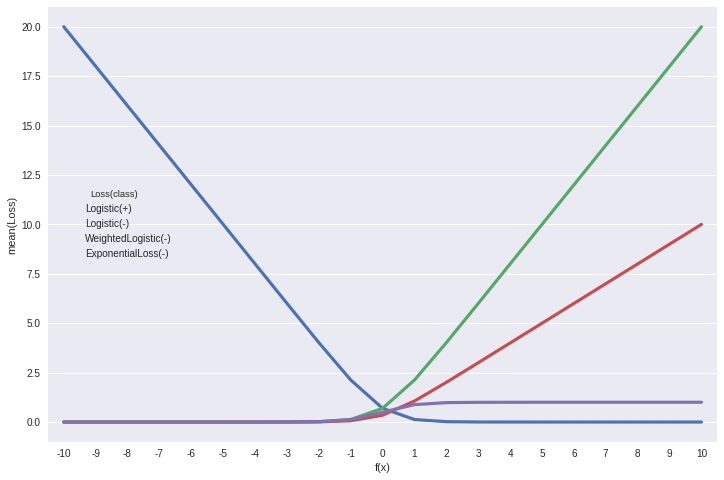

In [15]:
f, ax = plt.subplots(1, figsize=(12, 8))

frames = [df1, df2, df3, df4]
sns.pointplot(x='f(x)', y='Loss', hue='Loss(class)', data=pd.concat(frames),
            ax=ax, markers="")